#**Muh. Yusuf Fikry-H071221102**

###**1. Seleksi Unvariate**

In [1]:
# import library
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# memuat data
data = pd.read_csv("/content/Stunting_Dataset.csv")
data.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [3]:
# memilih data yang dibutuhkan
X = data.iloc[:,2:6]  #independent colums
y = data.iloc[:,1]    # target colum i.e price range

In [4]:
# menerapkan SelectKBest untuk melakukan ekstraksi
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs      Score
3   Body Length  61.871062
2   Body Weight  58.787380
0  Birth Weight   6.963331
1  Birth Length   1.426650


###**2. Feature Importance**

In [6]:
# import library
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [7]:
# memuat data
data = pd.read_csv("/content/Stunting_Dataset.csv")
X = data.iloc[:,2:6]  #independent columns
y = data.iloc[:,1]    #target column i.e price range

In [8]:
# melakukan ExtraTreesClassifier untuk mengekstraksi fitur
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

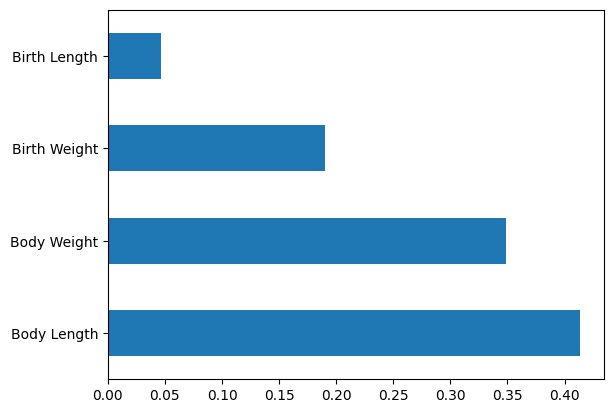

In [9]:
# melakukan plot dari feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

###**3. Matriks Korelasi dengan Heatmap**

In [10]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# memuat data
data = pd.read_csv("/content/Stunting_Dataset.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [12]:
# mendapatkan  correlations dari setiap fitur dalam dataset
corrmat = data.corr()
top_corr_features = corrmat.index

<ipython-input-12-4292eadc843f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


**Matriks Korelasi dengan Heatmap**

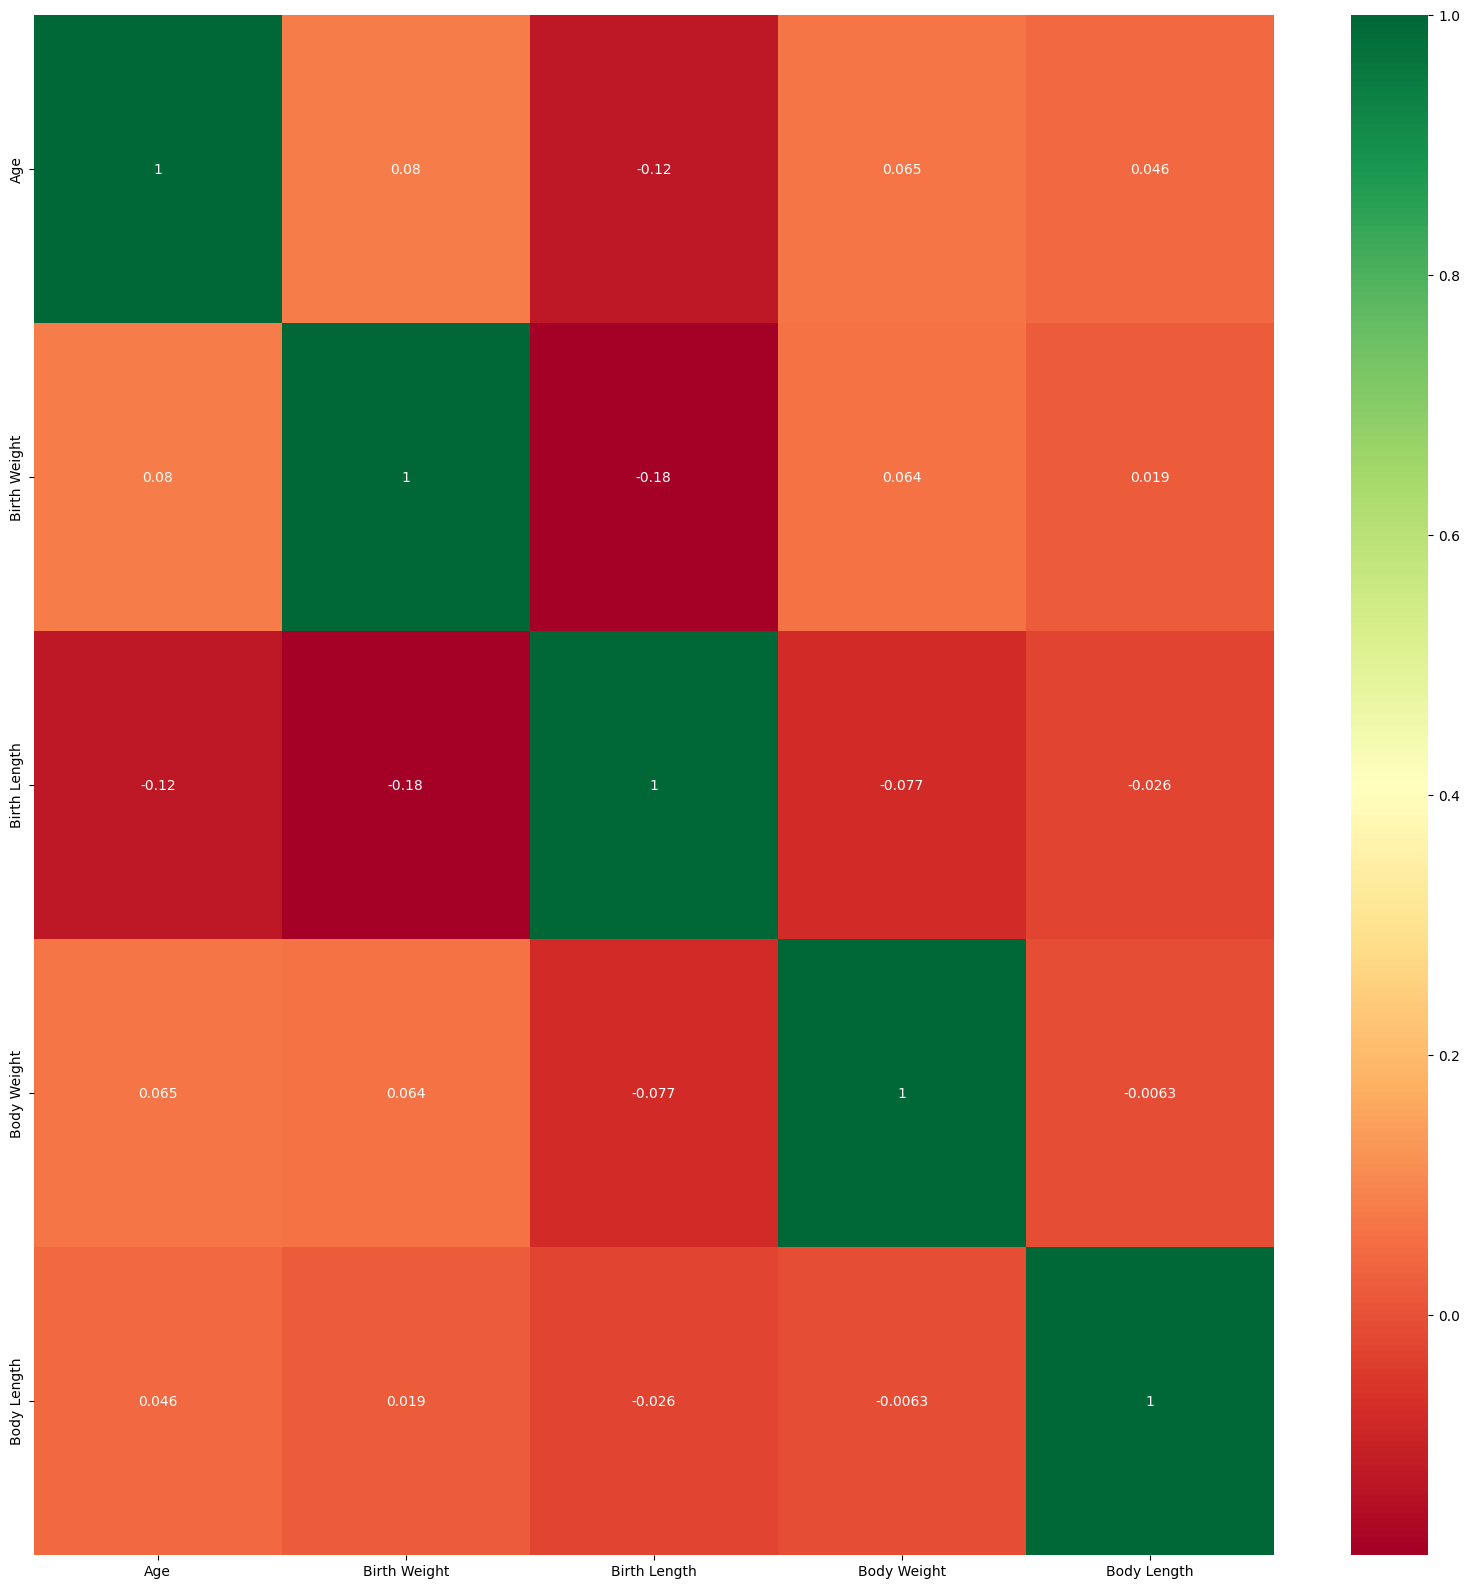

In [13]:
# plot heatmap
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Kesimpulan dari heatmap:
1. Age memiliki korelasi positif (searah) dengan terdapat variabel fitur yaitu "Body length" yang tertinggi. Korelasinya termasuk cukup kuat karena berkisar 0.2.

2. Age berkorelasi lemah (tidak berkorelasi) dengan variabel fitur lainnya yaitu "Birth Weight" dikarenakan nilai korelasinya hampir bernilai nol yaitu sekitar 0.0019.

3. Age berkorelasi negatif (berlawanan arah) dengan "Birth Length" dan "Body Weight" dinilai tergolong korelasi negatif lemah karena memiliki nilai menuju nol, yaitu sekitar -0.0063 yang dapat disimpulkan tidak saling berkorelasi.

